In [24]:
import networkx as nx
from matplotlib import pyplot as plt

In [25]:
reads = []

with open('1002033072.txt', 'r') as fp:
    for i in fp:
        control = i[:-1]
        reads.append(control)
        
reads

['gac', 'acg', 'cgc', 'cgt', 'tcg', 'gag', 'aga']

In [26]:
def k_mer(reads, k):
    kmerlist = []
    kmer_read = {}

    for i in range(len(reads)):
        map_key = reads[i] + '_' + str(i)
        if kmer_read.get(map_key, '') == '':
            kmer_read[map_key] = []
        for j in range(len(reads[i]) - k + 1):
            kmer = reads[i][j:j+k]
            kmerlist.append(kmer)
            
            kmer_read[map_key].append(kmer)
    
    return set(kmerlist), kmer_read

kmers, kmer_read = k_mer(reads, k=2)
    

In [27]:
kmers

{'ac', 'ag', 'cg', 'ga', 'gc', 'gt', 'tc'}

In [28]:
kmer_read

{'gac_0': ['ga', 'ac'],
 'acg_1': ['ac', 'cg'],
 'cgc_2': ['cg', 'gc'],
 'cgt_3': ['cg', 'gt'],
 'tcg_4': ['tc', 'cg'],
 'gag_5': ['ga', 'ag'],
 'aga_6': ['ag', 'ga']}

In [29]:
km = list(kmers)
print(km)

file = open('kmers.txt', 'w')

for i in range(0,7):
    file.write(km[i] + "\n")

file.close()

['gt', 'tc', 'ga', 'cg', 'gc', 'ag', 'ac']


In [30]:
kmer_read

{'gac_0': ['ga', 'ac'],
 'acg_1': ['ac', 'cg'],
 'cgc_2': ['cg', 'gc'],
 'cgt_3': ['cg', 'gt'],
 'tcg_4': ['tc', 'cg'],
 'gag_5': ['ga', 'ag'],
 'aga_6': ['ag', 'ga']}

In [31]:
kmer = []

with open('kmers.txt','r') as fp:
    for i in fp:
        control = i[:-1]
        kmer.append(control)
        
kmer


['gt', 'tc', 'ga', 'cg', 'gc', 'ag', 'ac']

In [32]:
kmer = set(kmer)
print(kmer)

{'gt', 'tc', 'ga', 'cg', 'gc', 'ag', 'ac'}


In [33]:
list_edges = []
for read in kmer_read:
    list_edges.append(kmer_read[read])

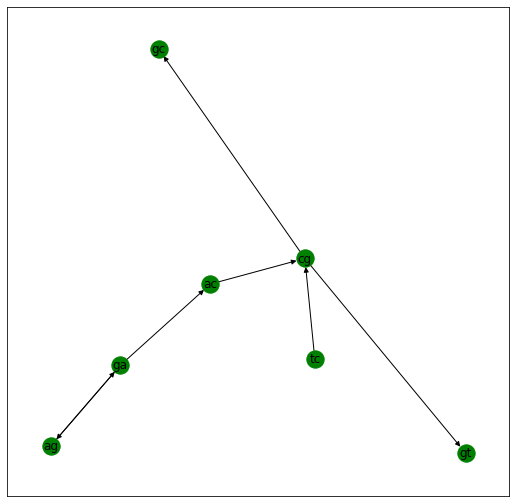

In [35]:
G = nx.DiGraph()  
G.add_edges_from(list_edges)
                 
plt.figure(figsize =(9, 9))
nx.draw_networkx(G, node_color = 'green')

In [15]:
#Possible sequence - 
#AGACGC 
#AGACGT 
#TCGT 
#TCGC

# Add reads 
#CGG 
#TCC

#Generates an eulerian walk with the genome assembly as below
#AGACGCGTCG